## Importing libraries

In [1]:
import math
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from matplotlib.patches import Wedge
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

In [2]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\hapiness_report_2022.csv", index_col=None)
df = df.sort_values("score").reset_index(drop=True)

### Style settings

In [20]:
font_family = "sans-serif"
background_color = "#F8F1F1"
text_color = "#040303"

sns.set_style({
    "axes.facecolor": background_color,
    "figure.facecolor": background_color,
    "font.family": font_family,
    "text.color": text_color,
})

### Global settings

In [4]:
START_ANGLE = 100 # At what angle to start drawing the first wedge
END_ANGLE = 450 # At what angle to finish drawing the last wedge
SIZE = (END_ANGLE - START_ANGLE) / len(df) # The size of each wedge
PAD = 0.2 * SIZE # The padding between wedges

INNER_PADDING = 2 * df.score.min()
LIMIT = (INNER_PADDING + df.score.max()) * 1.3 # Limit of the axes

Inner padding creates distance between the origo and the start of each wedge. It opens a space in the middle of the graph where I can add a title.

### Drawing wedges

In [5]:
def draw_wedge(ax, start_angle, end_angle, length, bar_length, color):
    ax.add_artist(
        Wedge((0, 0),
            length, start_angle, end_angle,
            color=color, width=bar_length
        )
    )

Create a function to draw wedge based on angles, length, and color

#### Test plotting

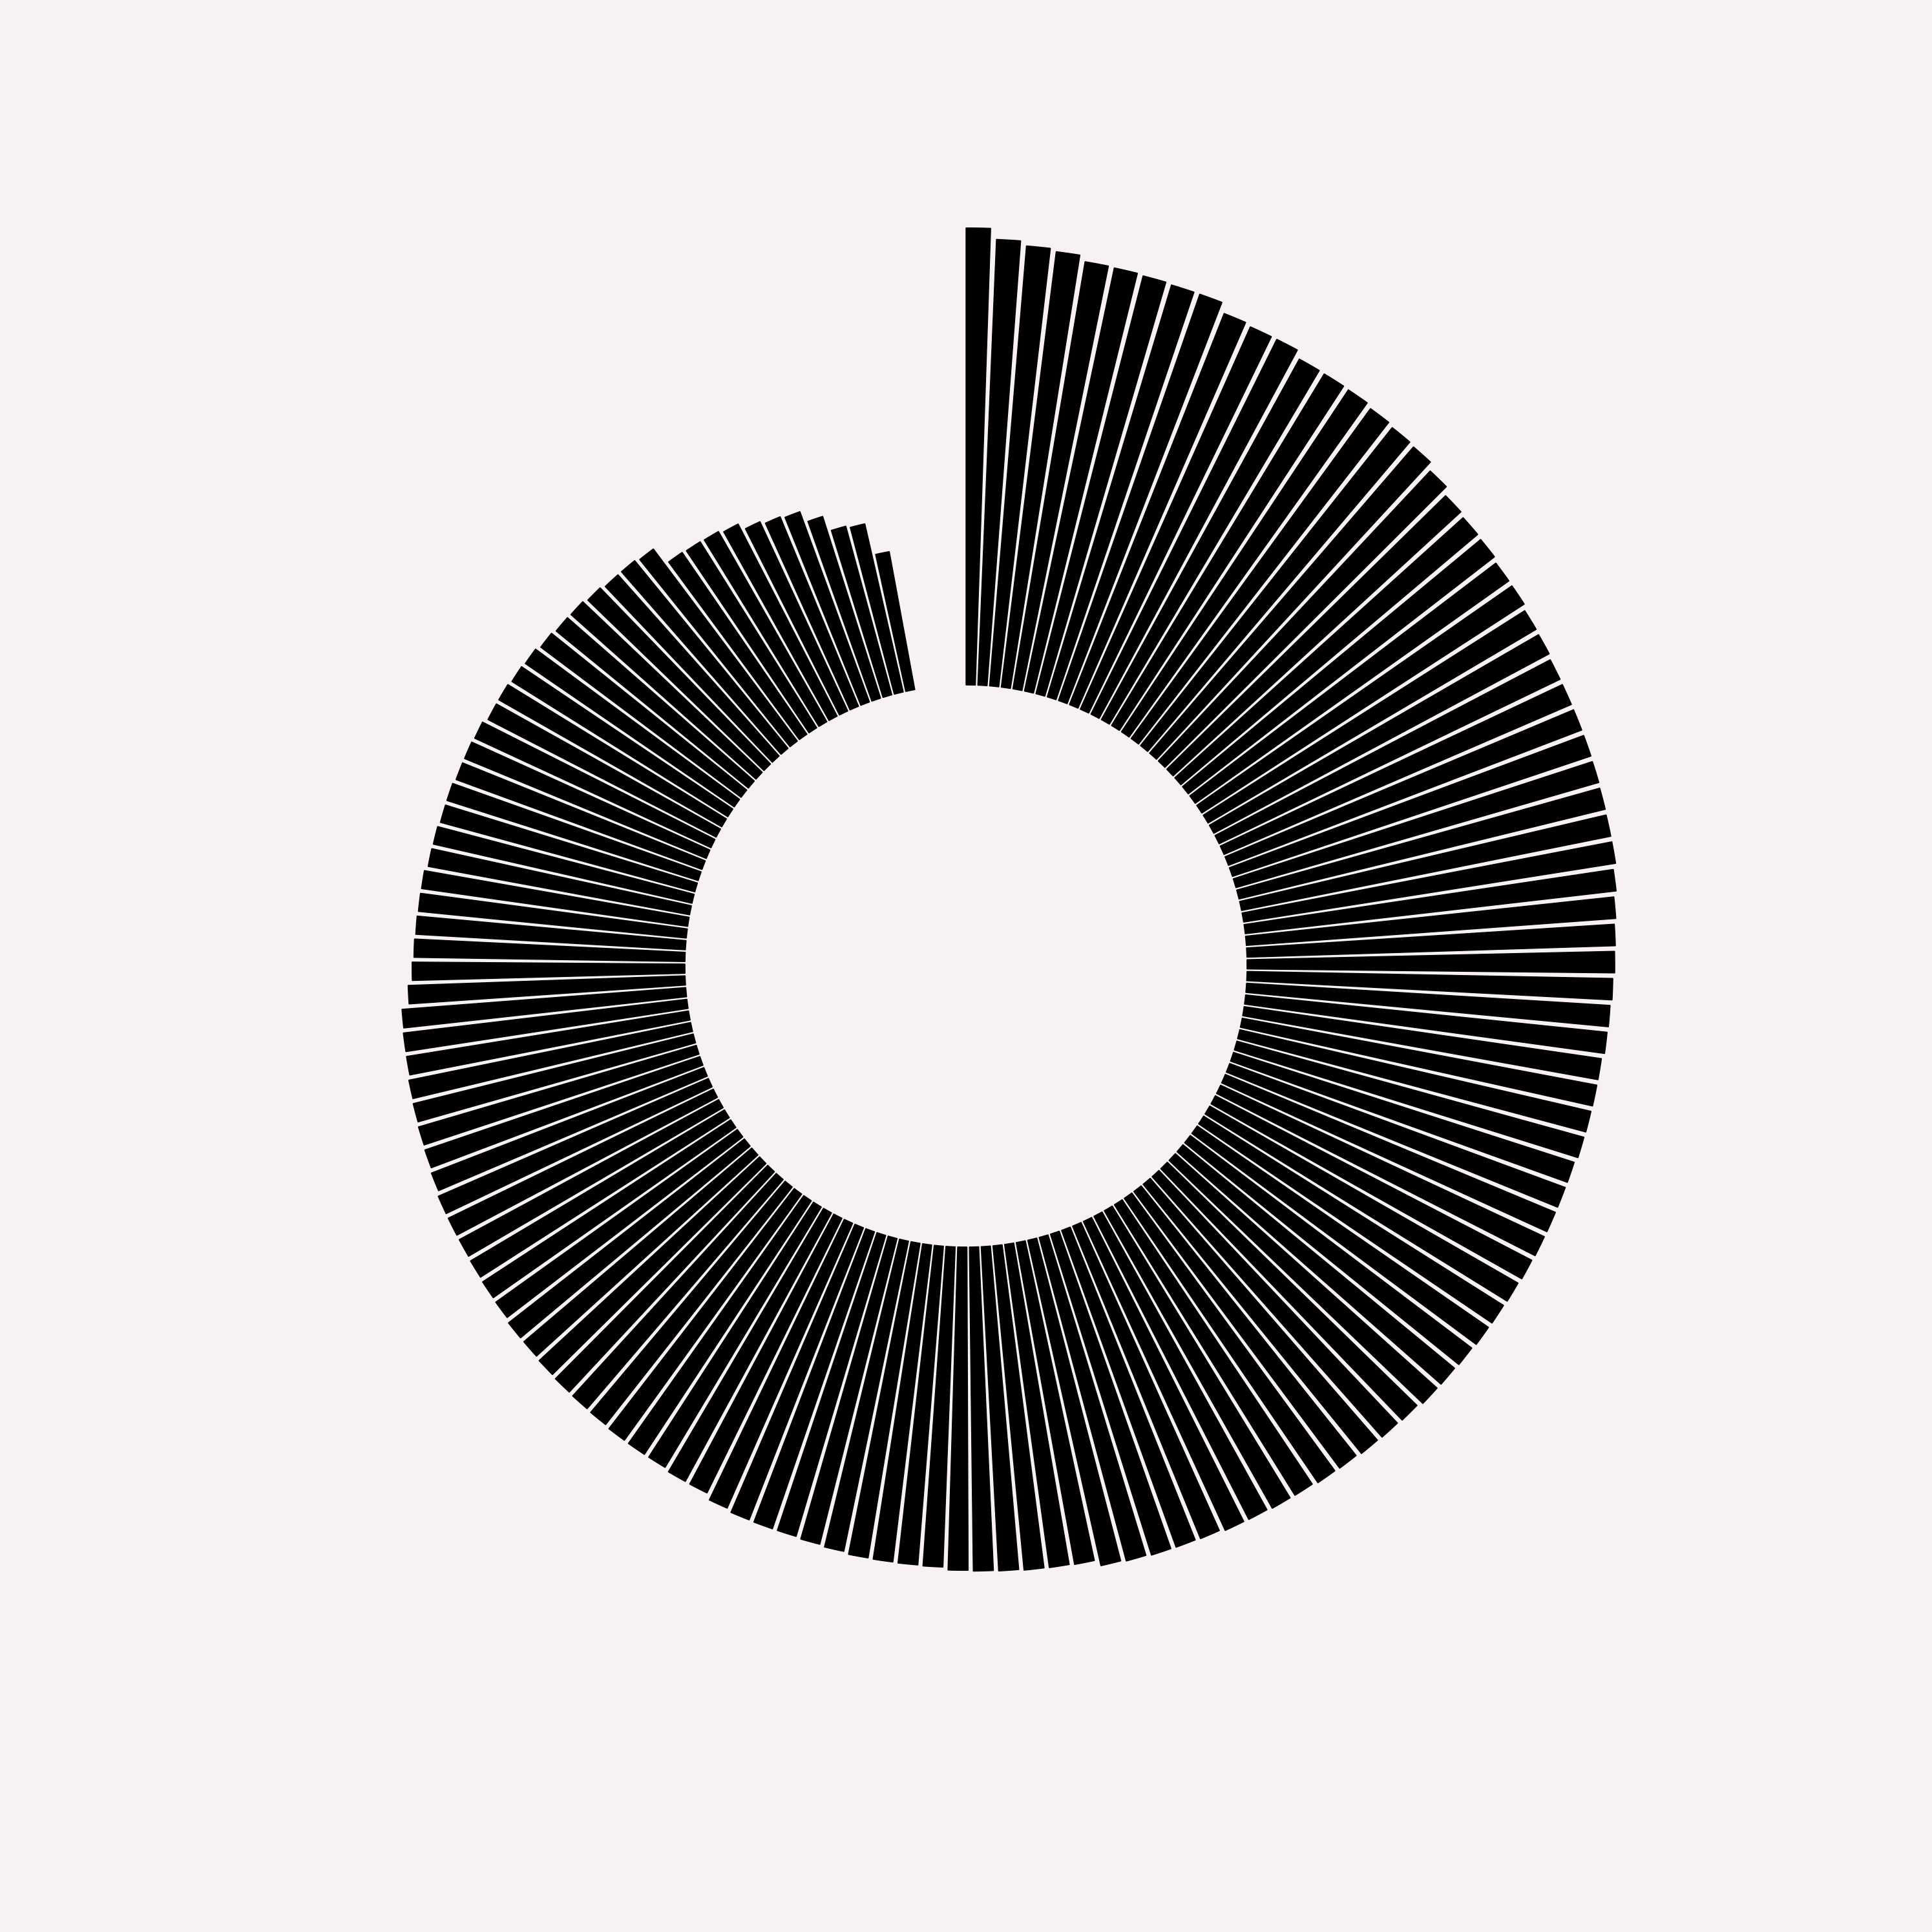

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, row in df.iterrows():
    bar_length = row.score
    name = row.country
    length = bar_length + INNER_PADDING
    start = 100 + i*SIZE + PAD
    end = 100 + (i+1)*SIZE
    angle = (end + start) / 2

    draw_wedge(ax, start, end, length, bar_length, "#000")

plt.axis("off")
plt.tight_layout()
plt.show()

### Add colors

In [7]:
def color(income_group):
    if income_group == "High income":
        return "#468FA8"
    elif income_group == "Lower middle income":
        return "#E5625E"
    elif income_group == "Upper middle income":
        return "#62466B"
    elif income_group == "Low income":
        return "#6B0F1A"
    else:
        return "#909090"

#### Test plotting

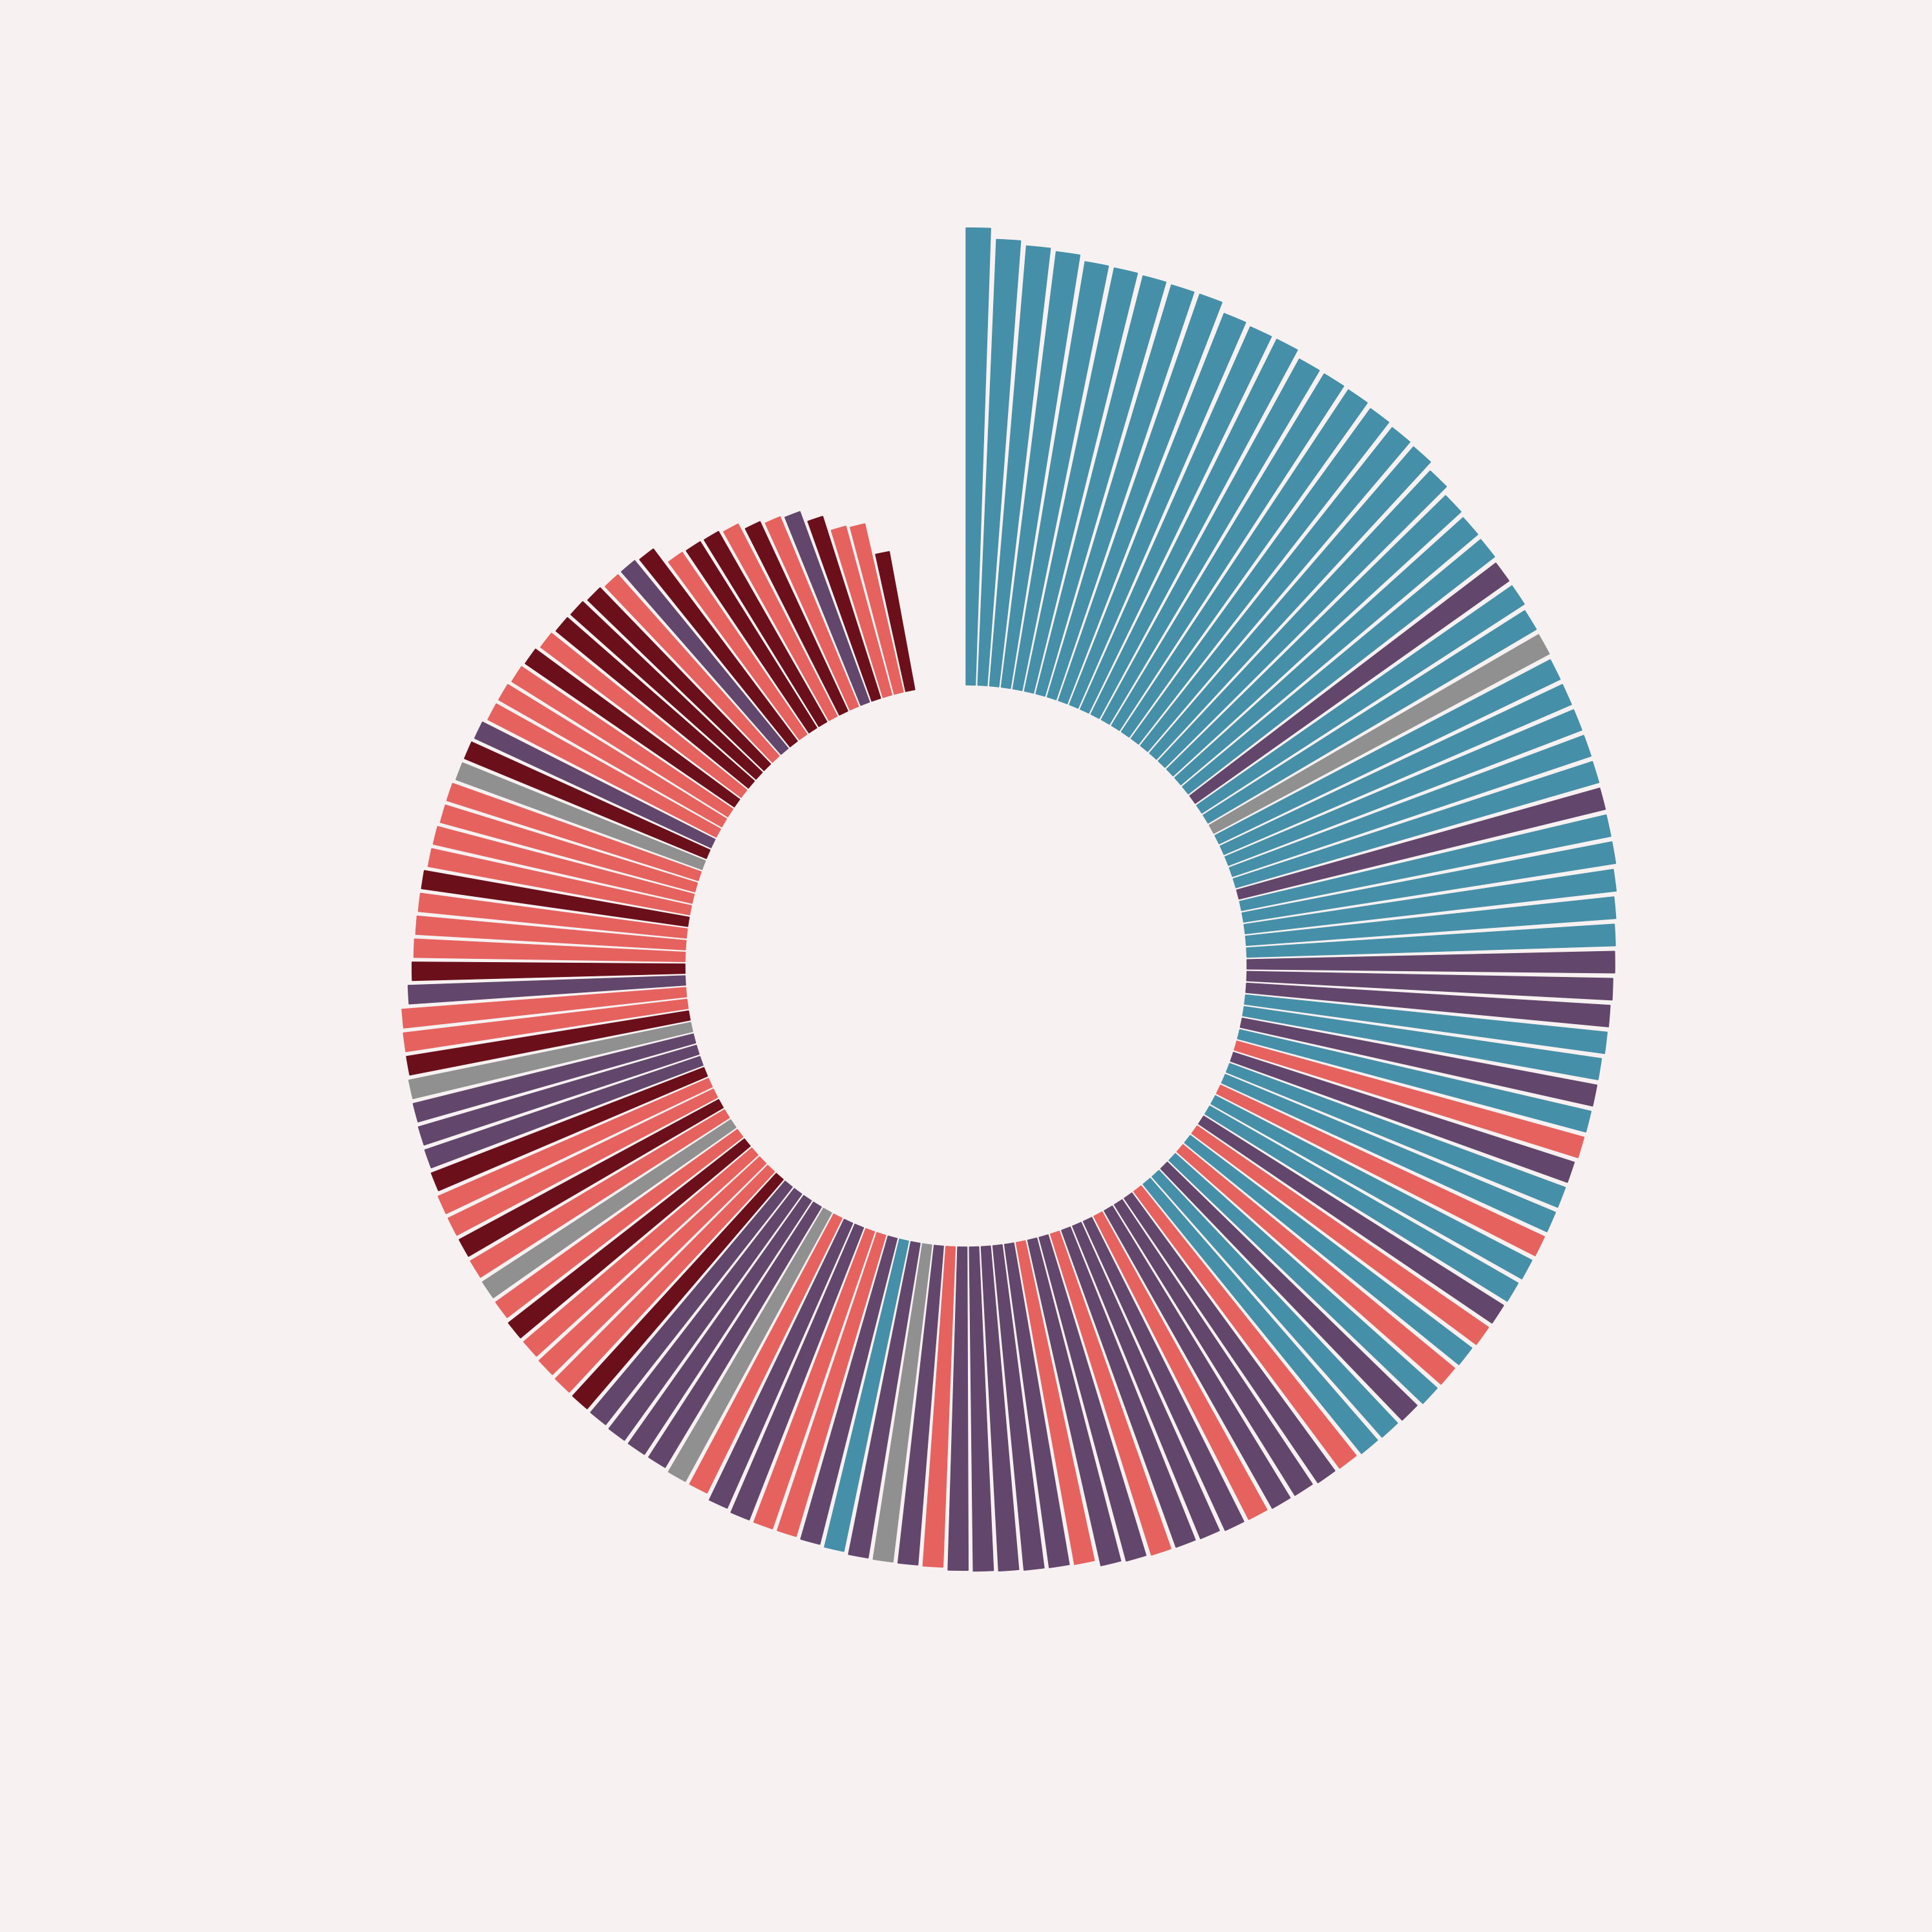

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, row in df.iterrows():
    bar_length = row.score
    name = row.country
    length = bar_length + INNER_PADDING
    start = 100 + i*SIZE + PAD
    end = 100 + (i+1)*SIZE
    angle = (end + start) / 2

    draw_wedge(ax, start, end, length, bar_length, color(row.income))

plt.axis("off")
plt.tight_layout()
plt.show()

### Add labels

Get positions to place labels. \n
The function below takes the length of a wedge and its angle to calculate a position. Padding pushes the position away from the bar to add some visual space.

In [10]:
def get_xy_with_padding(length, angle, padding):
    x = math.cos(math.radians(angle)) * (length + padding)
    y = math.sin(math.radians(angle)) * (length + padding)
    return x, y

#### Add flags

In [50]:
def add_flag(ax, x, y, name2, zoom, rotation):
    flag = Image.open("C:/Users/ADMIN/Desktop/120x90/{}.png".format(name2.lower()))
    flag = flag.rotate(rotation if rotation > 270 else rotation - 180)
    im = OffsetImage(flag, zoom=zoom, interpolation="lanczos", resample=True, visible=True)

    ax.add_artist(AnnotationBbox(
        im, (x, y), frameon=False,
        xycoords="data",
    ))

#### Add country name & score

Change the rotation if the angle exceeds 270 degrees. Otherwise, the text would be upside down.

In [18]:
def add_text(ax, x, y, country, score, angle):
    if angle < 270:
        text = "{} ({})".format(country, score)
        ax.text(x, y, text, fontsize=13, rotation=angle-180, ha="right", va="center", rotation_mode="anchor")
    else:
        text = "({}) {}".format(score, country)
        ax.text(x, y, text, fontsize=13, rotation=angle, ha="left", va="center", rotation_mode="anchor")

#### Test plotting

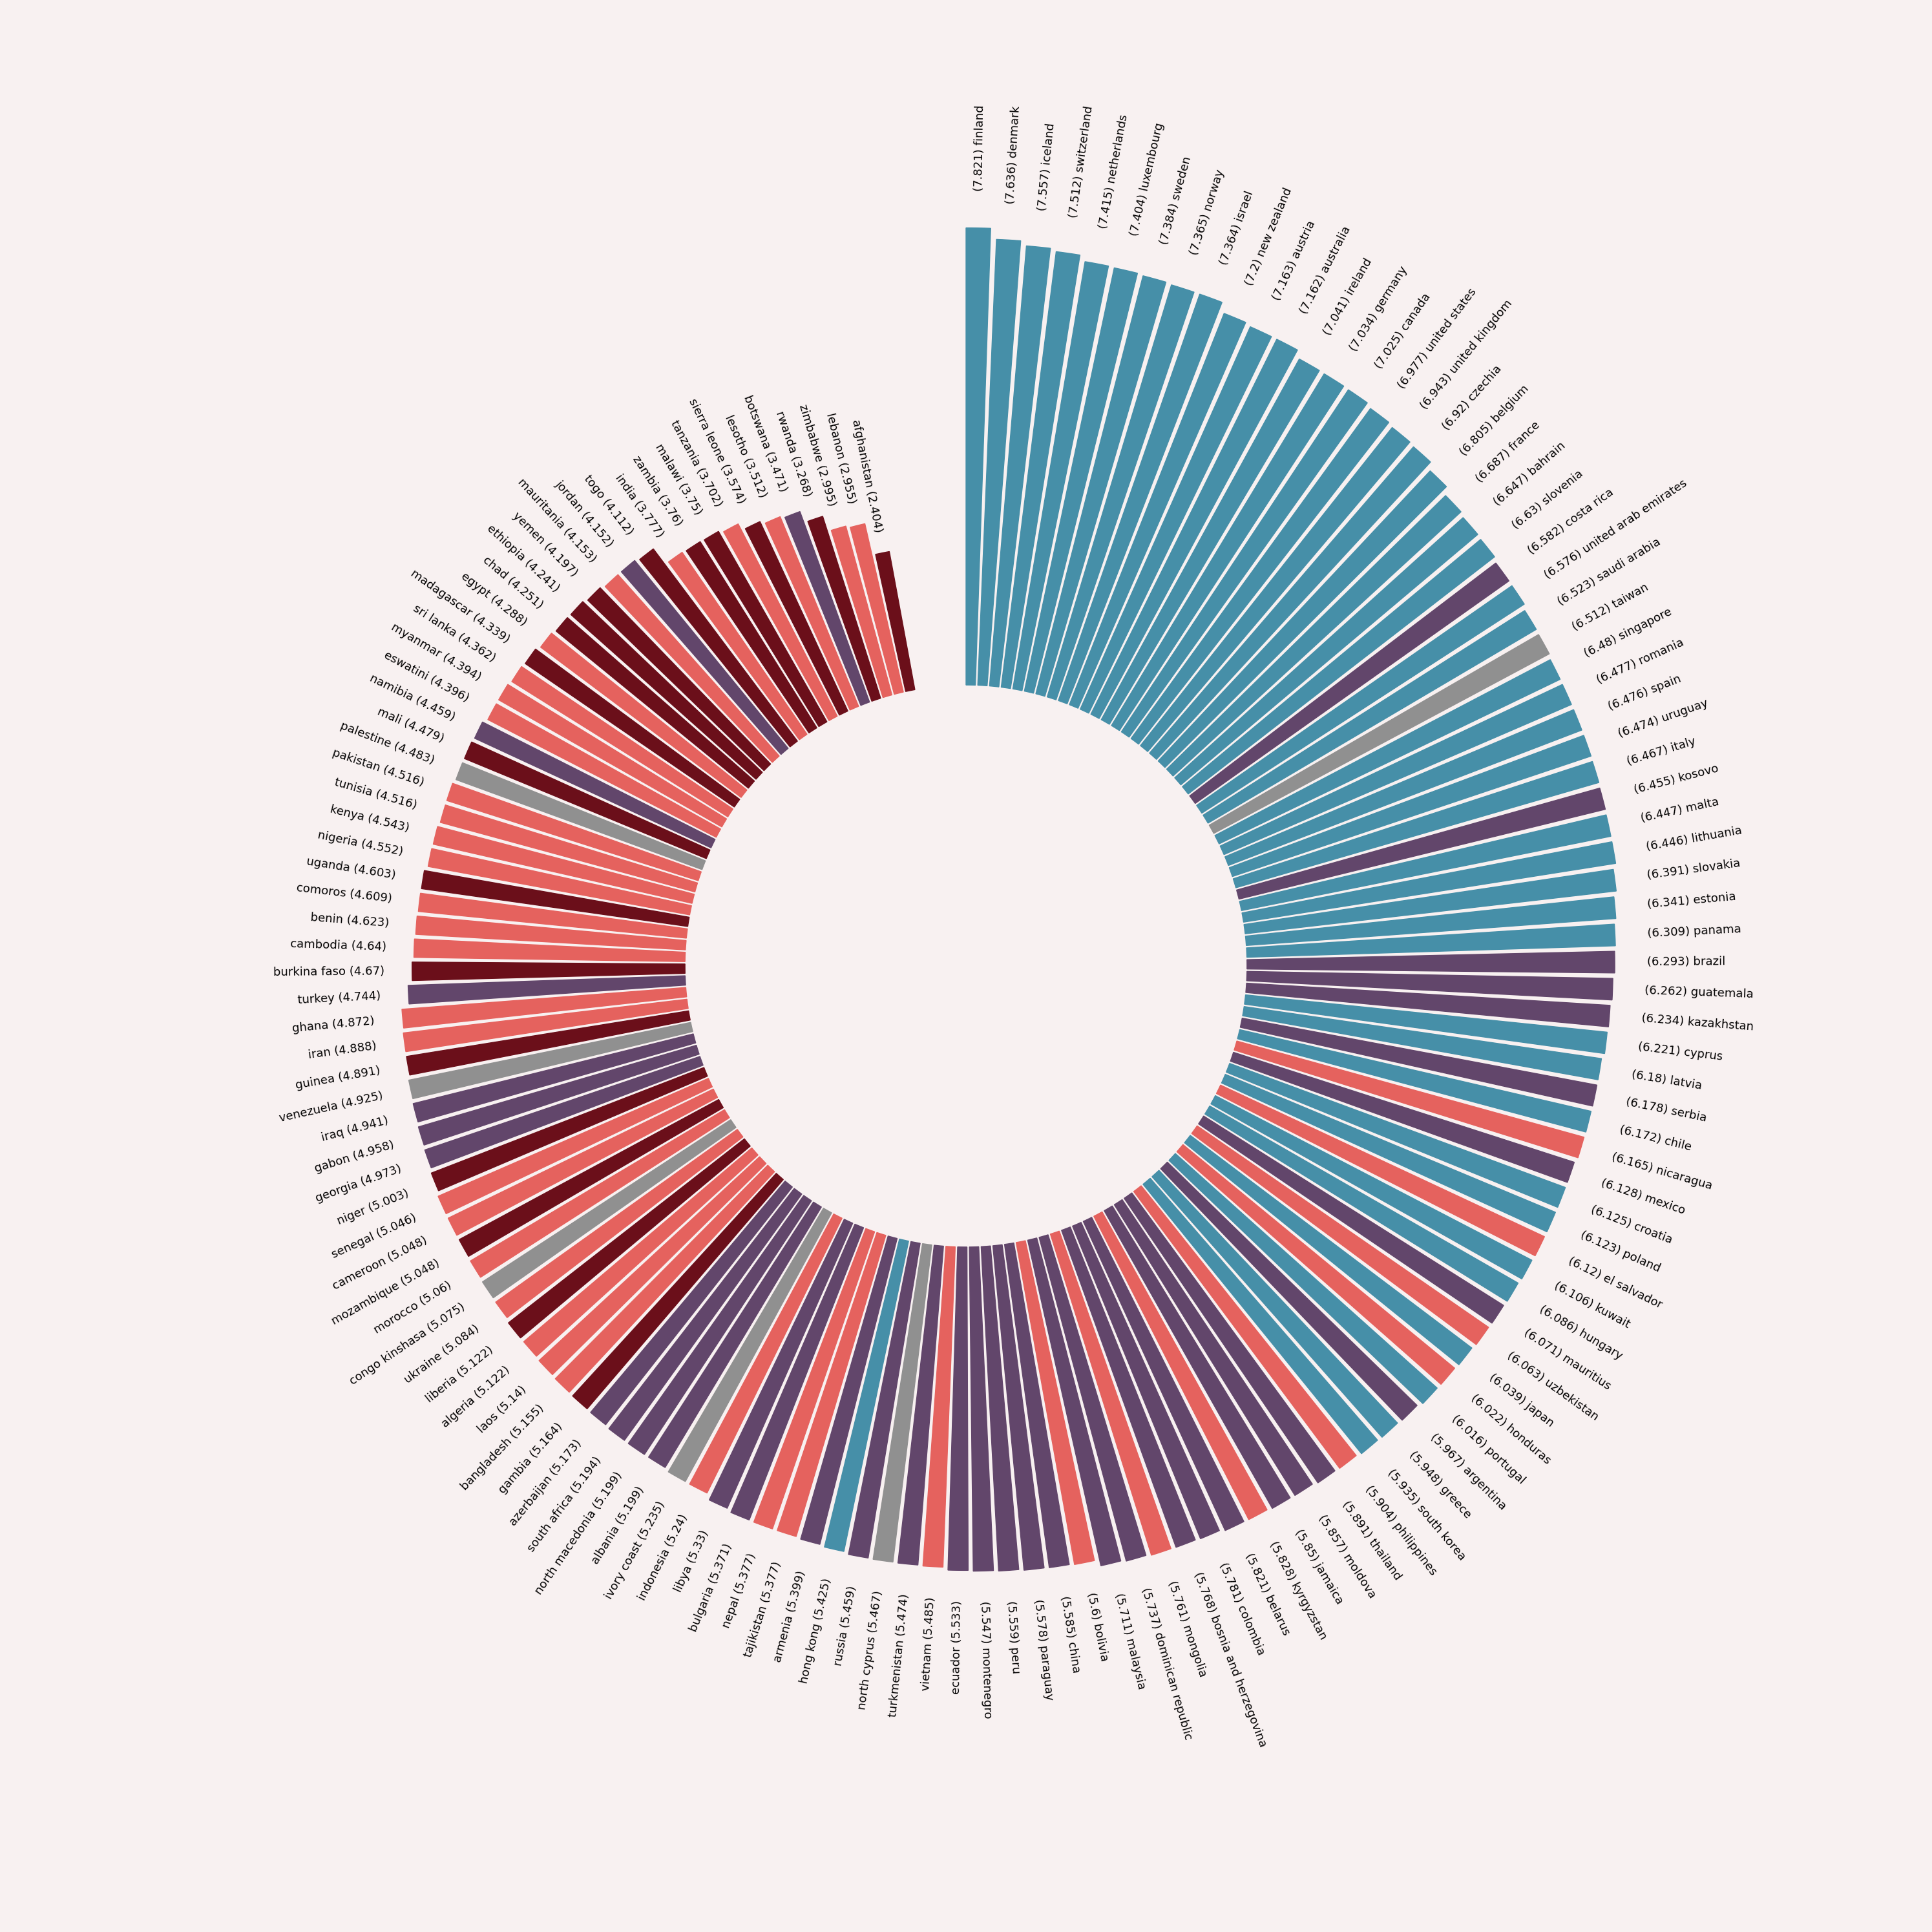

In [57]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, row in df.iterrows():
    bar_length = row.score
    name = row.country
    length = bar_length + INNER_PADDING
    start = 100 + i*SIZE + PAD
    end = 100 + (i+1)*SIZE
    angle = (end + start) / 2
    
    text_x, text_y = get_xy_with_padding(length, angle, 0.05 * length)

    draw_wedge(ax, start, end, length, bar_length, color(row.income))
    add_text(ax, text_x, text_y, row.country, bar_length, angle)
    
plt.axis("off")
plt.tight_layout()
plt.show()

### Add information

#### Draw reference line

In [54]:
def draw_reference_line(ax, point, size, padding, fontsize=18):
    draw_wedge(ax, 0, 360, point+padding+size/2, size, background_color)
    ax.text(-0.6, padding + point, point, va="center", rotation=1, fontsize=fontsize)

#### Add legend

In [58]:
def add_legend(labels, colors, title):
    lines = [
        Line2D([], [], marker='o', markersize=24, linewidth=0, color=c) 
        for c in colors
    ]

    plt.legend(
        lines, labels,
        fontsize=18, loc="upper left", alignment="left",
        borderpad=1.3, edgecolor="#E4C9C9", labelspacing=1,
        facecolor="#F1E4E4", framealpha=1, borderaxespad=1,
        title=title, title_fontsize=20,
    )

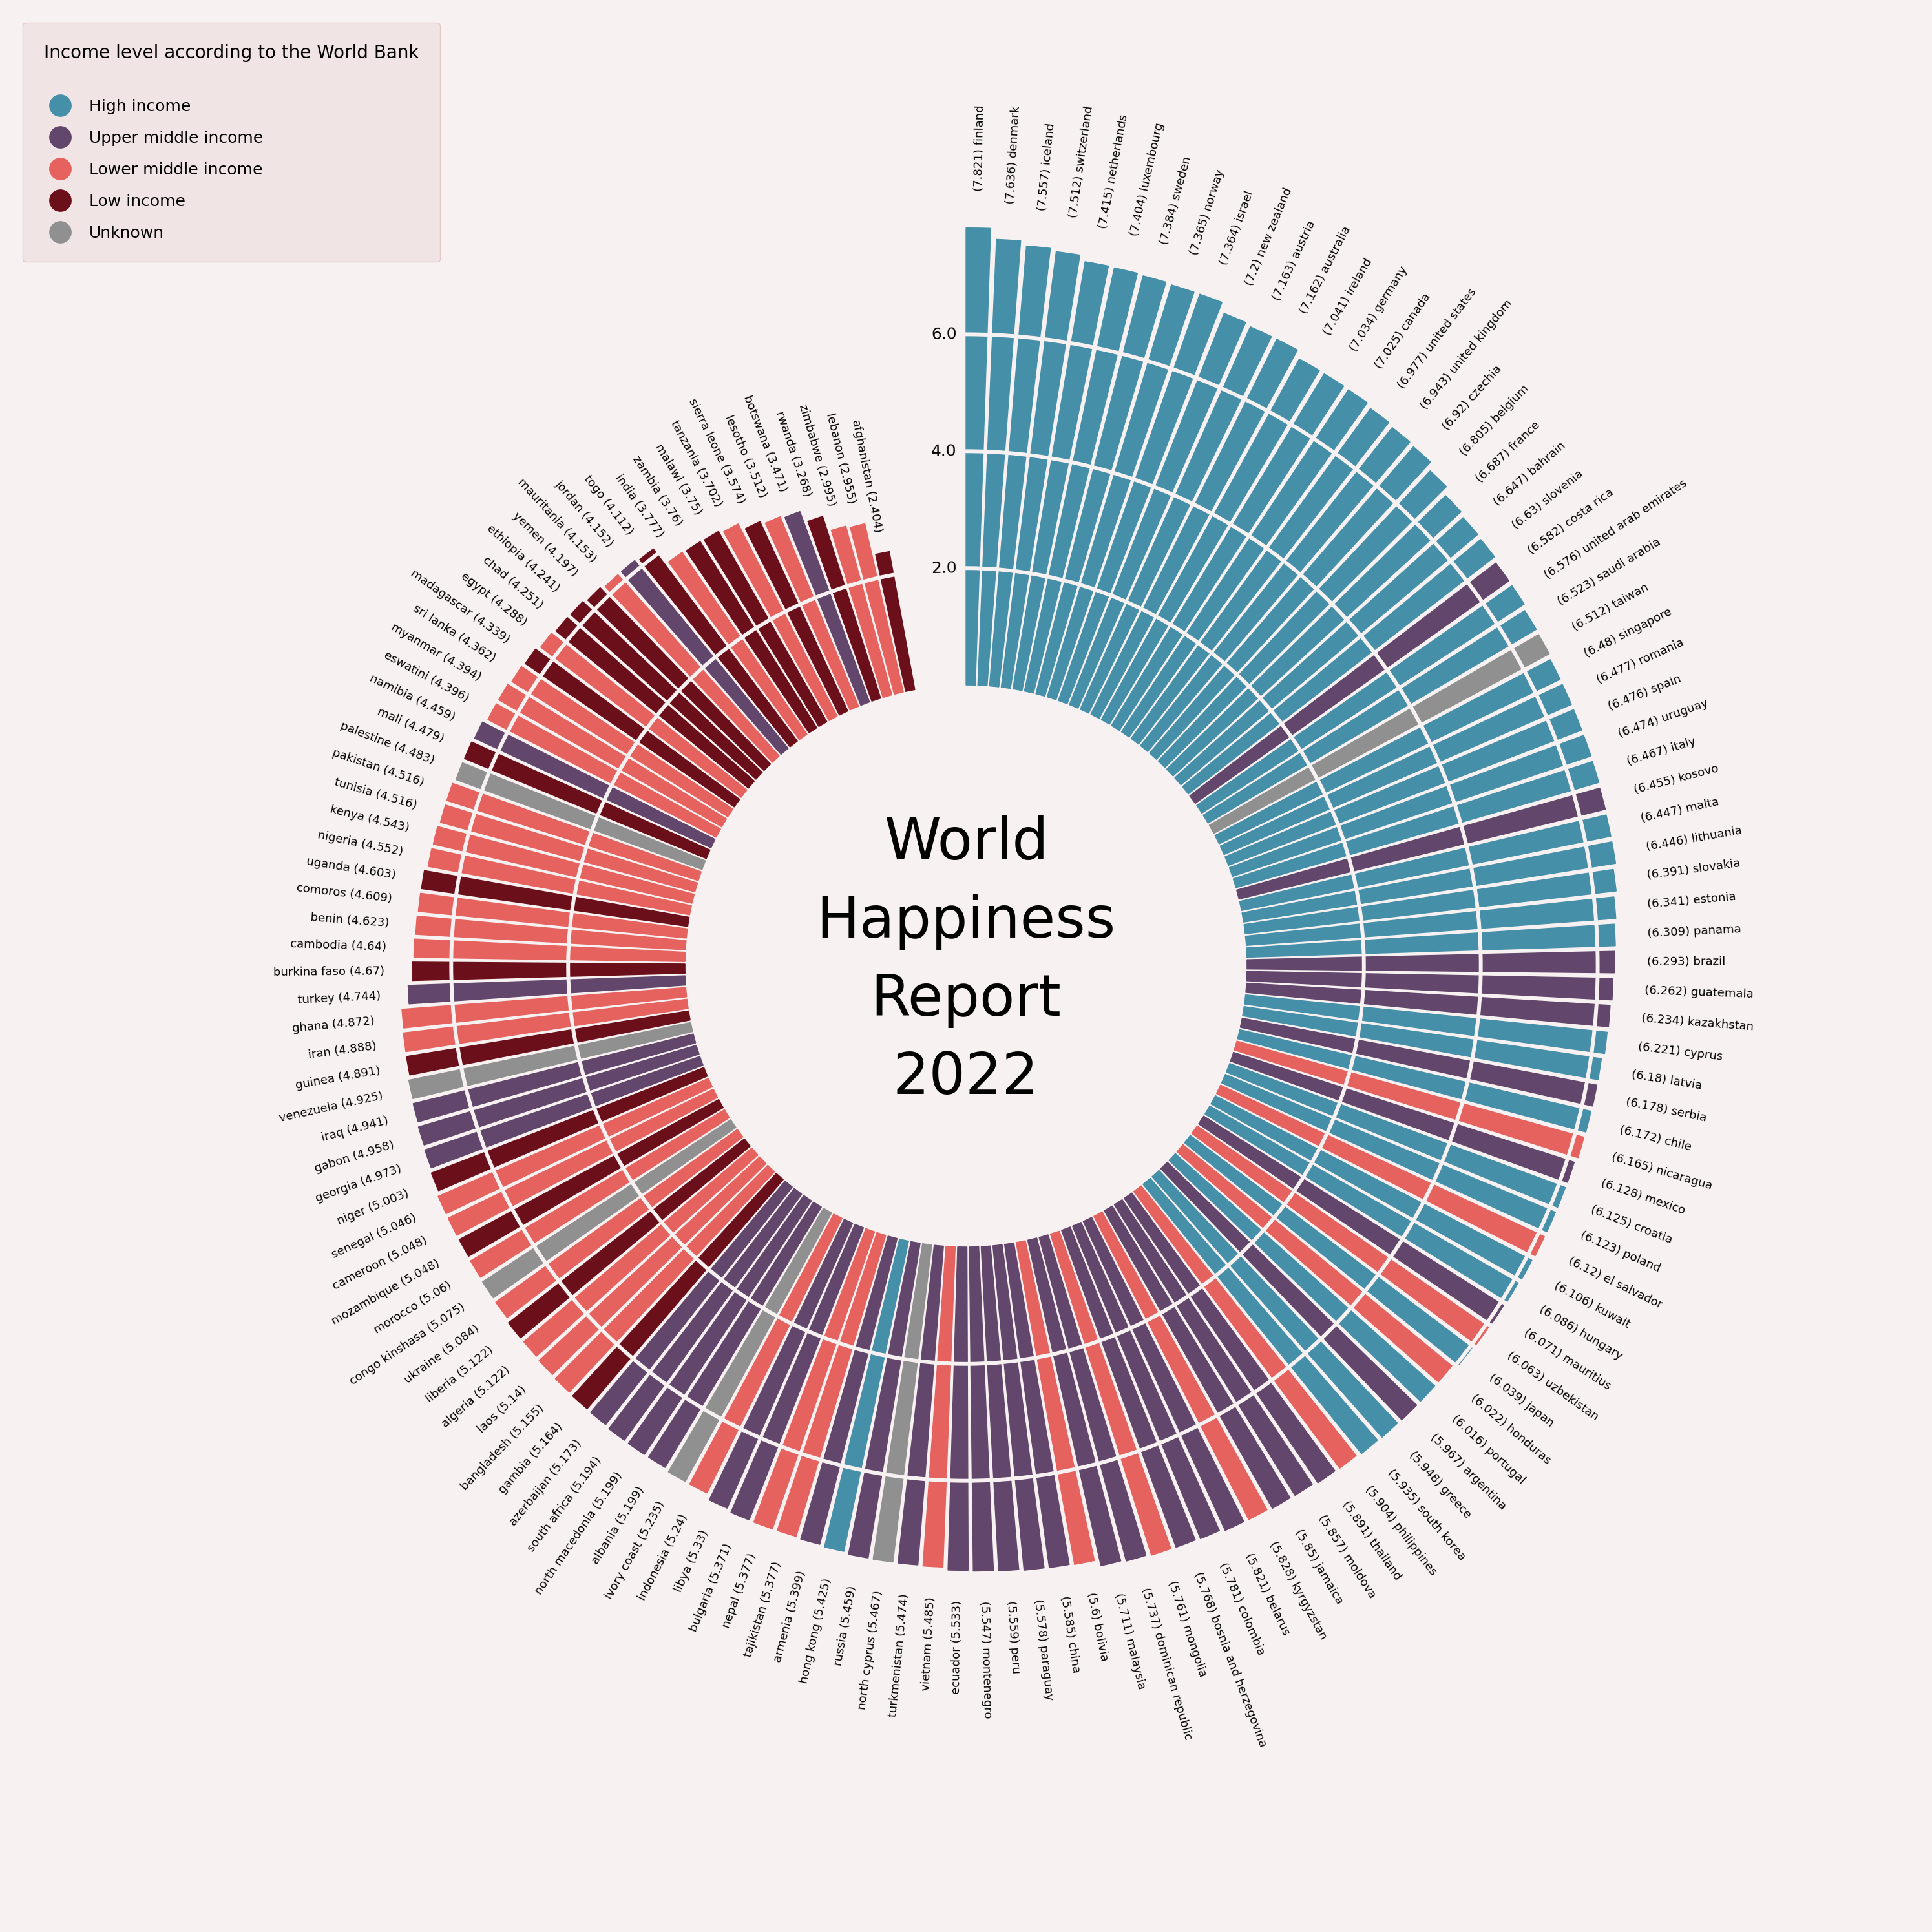

In [60]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 30))
ax.set(xlim=(-LIMIT, LIMIT), ylim=(-LIMIT, LIMIT))

for i, row in df.iterrows():
    bar_length = row.score
    name = row.country
    length = bar_length + INNER_PADDING
    start = 100 + i*SIZE + PAD
    end = 100 + (i+1)*SIZE
    angle = (end + start) / 2
    
    text_x, text_y = get_xy_with_padding(length, angle, 0.05 * length)

    draw_wedge(ax, start, end, length, bar_length, color(row.income))
    add_text(ax, text_x, text_y, row.country, bar_length, angle)

draw_reference_line(ax, 2.0, 0.05, INNER_PADDING)
draw_reference_line(ax, 4.0, 0.05, INNER_PADDING)
draw_reference_line(ax, 6.0, 0.05, INNER_PADDING)

add_legend(
    labels=["High income", "Upper middle income", "Lower middle income", "Low income", "Unknown"],
    colors=["#468FA8", "#62466B", "#E5625E", "#6B0F1A", "#909090"],
    title="Income level according to the World Bank\n")
    
plt.title(
  "World Happiness Report 2022".replace(" ", "\n"), 
  x=0.5, y=0.5, va="center", ha="center", 
  fontsize=64, linespacing=1.5
)

plt.axis("off")
plt.tight_layout()
plt.show()